<a href="https://colab.research.google.com/github/daniyal9538/CID/blob/master/training_cid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from matplotlib import pyplot as plt
import csv

In [0]:
start_file = 1
end_file = 10

In [0]:
# Authenticate to GCS.
from google.colab import auth
auth.authenticate_user()

# https://cloud.google.com/resource-manager/docs/creating-managing-projects
project_id = 'test-demo-222423'
bucket_name = 'cid_training_data'
# Create the service client.
from googleapiclient.discovery import build
gcs_service = build('storage', 'v1')

from apiclient.http import MediaIoBaseDownload
count = [0]*9

In [0]:
data=[]
data_features=[]
data_labels=[]
for i in range (start_file, end_file+1):
  try: 
      download_name = "training_data-{}.npy".format(i)
      path_name = "balanced_data/balanced_data-mod-5-{}.npy".format(i)

      with open(download_name, 'wb') as f:
        # Download the file from a given Google Cloud Storage bucket.
        request = gcs_service.objects().get_media(bucket=bucket_name,
                                                  object=path_name)
        media = MediaIoBaseDownload(f, request)

        done = False
        while not done:
          # _ is a placeholder for a progress object that we ignore.
          # (Our file is small, so we skip reporting progress.)
          _, done = media.next_chunk()        
      temp=np.load(download_name)
      for x in temp:
        data.append(x)
        #data_features.append(x[0])
        #data_labels.append(x[1])
      !rm -rf $download_name
      print('Download complete ', download_name)
  except Exception as ex:
    print('Download failed', download_name, ex)

Download complete  training_data-1.npy
Download complete  training_data-2.npy
Download complete  training_data-3.npy
Download complete  training_data-4.npy
Download complete  training_data-5.npy
Download complete  training_data-6.npy
Download complete  training_data-7.npy
Download complete  training_data-8.npy
Download complete  training_data-9.npy
Download complete  training_data-10.npy


In [0]:
data_features=[]
data_labels=[]
np.random.shuffle(data)
for x in data:
  data_features.append(x[0])
  data_labels.append(x[1])

In [0]:
print(len(data))
print(len(data_features))
print(len(data_labels))

94370
94370
94370


[0, 0, 0, 1, 0] [0, 0, 0, 1, 0]


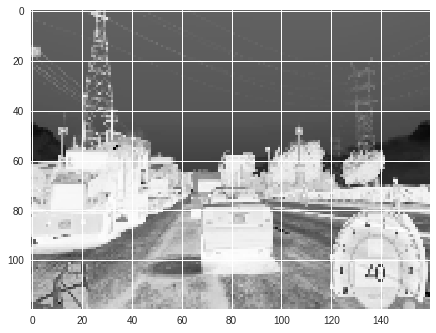

In [0]:
i =989
print(data_labels[i], data[i][1])
image1=data_features[i]
image=data[i][0]
plt.imshow(image)
plt.show()

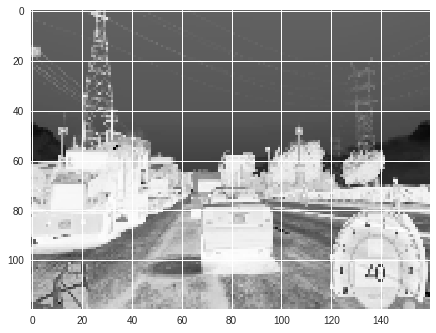

In [0]:
plt.imshow(image1)
plt.show()

In [0]:
X=[]
Y=[]
X_test=[]
Y_test=[]
#X.clear()

In [0]:
X=data_features[:-9400]
Y=data_labels[:-9400]

X_test=data_features[-9400:]
Y_test=data_labels[-9400:]
print(len(X_test), len(X))

X=np.array(X)
Y=np.array(Y)
X=X.reshape([-1, 160, 120, 1])

X_test=np.array(X_test)
Y_test=np.array(Y_test)
X_test=X_test.reshape([-1, 160, 120, 1])



9400 84970


In [0]:
print(X_test.shape)
print(X.shape)
print(Y_test.shape)
print(Y.shape)

(9400, 160, 120, 1)
(84970, 160, 120, 1)
(9400, 5)
(84970, 5)


In [0]:
MODEL_NAME='cid-simplifiedV0.16'

In [0]:
!pip install -q tflearn

In [0]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d,avg_pool_2d, conv_3d, max_pool_3d, avg_pool_3d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
from tflearn.layers.normalization import local_response_normalization
from tflearn.layers.merge_ops import merge

In [0]:
def modified_alexnet(width, height, lr, output=4):
    network = input_data(shape=[None, width, height, 1], name='input')
    network = conv_2d(network, 96, 11, strides=4, activation='relu')
    #network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = conv_2d(network, 256, 5, activation='relu')
    #network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = conv_2d(network, 384, 3, activation='relu')
    network = conv_2d(network, 384, 3, activation='relu')
    network = conv_2d(network, 256, 3, activation='relu')
    network = max_pool_2d(network, 3, strides=2)
    network = conv_2d(network, 256, 5, activation='relu')
    #network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = conv_2d(network, 384, 3, activation='relu')
    network = conv_2d(network, 384, 3, activation='relu')
    network = conv_2d(network, 256, 3, activation='relu')
    #network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    
   
    
    network = fully_connected(network, 4096, activation='relu')
    network = dropout(network, 0.85)
    network = fully_connected(network, output, activation='softmax')
    network = regression(network, optimizer='momentum',
                         loss='categorical_crossentropy',
                         learning_rate=lr, name='targets')

    model = tflearn.DNN(network, checkpoint_path='model_alexnetv0.13',
                        max_checkpoints=1, tensorboard_verbose=0, tensorboard_dir='log')

    return model

In [0]:
def alexnet_modified_v1(width, height, lr, output=9, model_name = 'alexnet_v1'):
    network = input_data(shape=[None, width, height, 1], name='input')
    network = conv_2d(network, 96, 11, strides=4, activation='relu')
    network = max_pool_2d(network, 1, strides=2)
    #network = local_response_normalization(network)
    network = conv_2d(network, 256, 5, activation='relu')
    network = max_pool_2d(network, 1, strides=2)
    #network = local_response_normalization(network)
    network = conv_2d(network, 384, 1, activation='relu')
    network = conv_2d(network, 384, 1, activation='relu')
    network = conv_2d(network, 256, 1, activation='relu')
    network = max_pool_2d(network, 1, strides=2)
    network = conv_2d(network, 256, 1, activation='relu')
    network = max_pool_2d(network, 1, strides=2)
    #network = local_response_normalization(network)
    network = conv_2d(network, 384, 1, activation='relu')
    network = conv_2d(network, 384, 1, activation='relu')
    network = conv_2d(network, 256, 1, activation='relu')
    network = max_pool_2d(network, 1, strides=2)
    network = local_response_normalization(network)
    network = fully_connected(network, 4096, activation='relu')
    network = dropout(network, 0.5)
    network = fully_connected(network, 4096, activation='relu')
    network = dropout(network, 0.5)
    network = fully_connected(network, 4096, activation='relu')
    network = dropout(network, 0.5)
    network = fully_connected(network, 4096, activation='relu')
    network = dropout(network, 0.5)
    network = fully_connected(network, output, activation='softmax')
    network = regression(network, optimizer='momentum',
                         loss='categorical_crossentropy',
                         learning_rate=lr, name='targets')

    model = tflearn.DNN(network, checkpoint_path=model_name,
                        max_checkpoints=1, tensorboard_verbose=0, tensorboard_dir='log')

    return model

In [0]:
model =modified_alexnet(160, 120, 1e-3, output=5)

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [0]:
model1 =alexnet_modified_v1(160, 120, 1e-3, 9, MODEL_NAME)

In [0]:
model.fit({'input': X}, {'targets': Y}, n_epoch = 30,validation_set = ({'input': X_test}, {'targets': Y_test}),
                snapshot_step = 2500, show_metric = True, run_id = 'MODEL_NAME')
model.save(MODEL_NAME)

Training Step: 1535  | total loss: 1.46857 | time: 176.177s
| Momentum | epoch: 002 | loss: 1.46857 - acc: 0.3594 -- iter: 13248/84970


In [0]:
model1.fit({'input': X}, {'targets': Y}, n_epoch = 30, validation_set = ({'input': X_test}, {'targets': Y_test}),
                snapshot_step = 2500, show_metric = True, run_id = MODEL_NAME)
model1.save(MODEL_NAME)

In [0]:
while(True):
  pass